In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Polymer PDI calculator and distribution generator

In [ ]:
# Input
#Constants
waterMw = 18.01 # g/mol
liquidDensity = 1.03 # kg/m³ 
avoNumber = 6.023E+23

# Input
#polymerMw_input = input("Enter polymerMw values separated by commas: ")
#polymerMw_values = [float(value) for value in polymerMw_input.split(',')]
ensembleSize = float(input("What is the size of simulation (cube) in nm? "))
percentPolymer = float(input("What % in w/v of polymer solution you need? ")) / 100
boxSize = ((ensembleSize * ensembleSize * ensembleSize) * 1e-21)  # conversion from nm3 to cm3

## PDI calculator

     1) Cooke, D.M. and Shi, A.C., 2006. Effects of polydispersity on phase behavior of diblock copolymers. Macromolecules, 39(19), pp.6661-6671.
    
    2) Stockmayer, W.H., 1952. Molecular distribution in condensation polymers. Journal of polymer science, 9(1), pp.69-71.

In [48]:
# because not explicitly counding the degree of polymerisatoin, Mn, which is the absolute value of polymerisation per polymer
# which is equivalent to average  polymerisation length/polymerisation length. Mn is used (implicit).
# the same argument above is applied to Mw of polymer
# PDI = Mw/Mn

# Input
#MW 
polymerMw_input = input("Enter polymerMw values separated by commas: ")
polymerMw_values = [float(value) for value in polymerMw_input.split(',')]

#Mn
polymerMn_input = input("Enter polymerMn values separated by commas: ")
polymerMn_values = [float(value) for value in polymerMn_input.split(',')]

#Function
def PDIofPolymersolution(polymerMw_values, polymerMn_values):
    total_result = 0
# Mw (averaging)
    for polymerMw in polymerMw_values:
        result = polymerMw
        total_result += result
        average_Mw = total_result / len(polymerMw_values)
# Mn
    for polymerMn in polymerMn_values:
        Mnresult = polymerMn
         
    return print(f'\n The PDI of the polymer solution with and Average Mw {round(average_Mw, 2)} kDa, with a range of Mn {min(polymerMn_values)} and {max(polymerMn_values)} is {average_Mw/Mnresult} \n Please note that 1 Da = 1 g/mol', flush=True)

#Call Function
PDIofPolymersolution(polymerMw_values, polymerMn_values)

Enter polymerMw values separated by commas:  2067.19, 2147.29, 2010.05, 2079.15, 2197.46, 1995.08, 2720.96, 2534.71, 2473.58, 2512.65, 2525.66, 2527.59, 3415.62, 3352.58, 3391.55, 3125.33, 3399.59, 3202.25, 2963.07, 2799.03, 2765.78, 2750, 3400.54
Enter polymerMn values separated by commas:  23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 30, 30, 30, 36, 36, 34, 36, 36, 36, 32, 32, 32, 36



 The PDI of the polymer solution with and Average Mw 2711.16 kDa, with a range of Mn 23.0 and 36.0 is 75.31003623188407 
 Please note that 1 Da = 1 g/mol


## Poplymer distribution generator/Packing suggestion, (i) Gaussian (ii) Stockmeyer (iii) Bimodal

### (i) Gaussian - toDo (concat polymer list with gaussian distribution list and print out)

In [173]:
#Distribution of polymer (homologes) in solution
import random

# (i) Gaussian  - code assisted with AI, specifically to clean up and polish loop

def generate_gaussian_distribution(total_result, num_iterations):
    for _ in range(num_iterations):
        t = np.random.randint(1, 6, size=23)
        p = [random.randint(1, 23) for _ in range(23)]
        mu = np.mean(t)
        sigma = np.std(t)
        Gaussian = np.random.normal(round(mu, 0), round(sigma, 0), 23)

        gauss = sum(Gaussian.tolist())

        # Define the range of values within which gauss should fall
        lower_limit = total_result - 2
        upper_limit = total_result + 2

        if lower_limit <= gauss <= upper_limit:
            print(f'The peptide number is: {Gaussian.tolist()}, for a total peptide amount of {round(gauss,0)}')
            break
        else:
            print('try again')

# Call the function with the desired total_result and number of iterations
generate_gaussian_distribution(total_result=76, num_iterations=5)  # Replace 5 with your desired number of iterations


try again
The peptide number is: [3.1092558640394663, 2.93696010948852, 2.5252256151643278, 3.61123994233988, 2.586115145387142, 4.3447833092693005, 0.6891637119086682, 4.276105741652618, 3.6562264065294645, 5.324343251915438, 2.7445422427077113, 2.9893540427336047, 2.6113461801320588, 2.7039920291058848, 2.747810358962794, 3.8952009250783206, 2.604243358577373, 1.9414307954659409, 3.553725012844775, 4.218738986076236, 3.913806497085778, 3.452275778762526, 4.749790351553939], for a total peptide amount of 75.0


The peptide number is: [3.007692655374709, 1.8972800615049568, 3.101234831361474, 2.8548457181940283, 2.316984840435558, 3.946628844578141, 4.429034087142806, 4.891300459713785, 3.6352160267651277, 2.7118287863998076, 3.842370161016277, 1.6822892208430418, 2.674811238990266, 3.2012765319583956, 1.5104137897611813, 4.911960032172581, 4.691456130404677, 4.991633082472175, 3.517638964306354, 3.255543003305325, 2.936566357206912, 3.7389932134044, 2.4057400721884497], for a total peptide amount of 76.0


/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_57152/2974336755.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


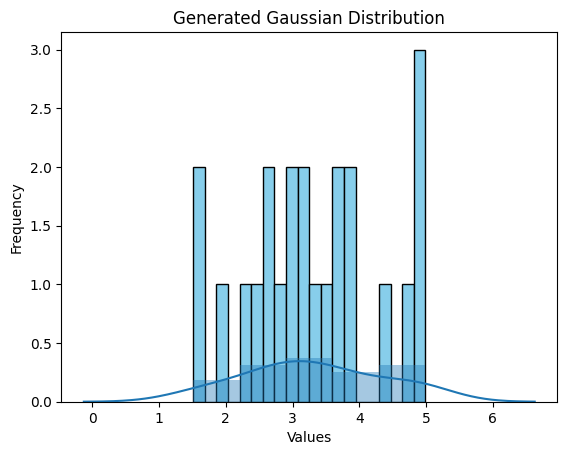

In [240]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_gaussian_distribution(total_result, num_iterations):
    for _ in range(num_iterations):
        t = np.random.randint(1, 6, size=23)
        p = [random.randint(1, 23) for _ in range(23)]
        mu = np.mean(t)
        sigma = np.std(t)
        Gaussian = np.random.normal(round(mu, 0), round(sigma, 0), 23)

        gauss = sum(Gaussian.tolist())

        # Define the range of values within which gauss should fall
        lower_limit = total_result - 2
        upper_limit = total_result + 2

        if lower_limit <= gauss <= upper_limit:
            print(f'The peptide number is: {Gaussian.tolist()}, for a total peptide amount of {round(gauss,0)}')
            plot_histogram(Gaussian, title="Generated Gaussian Distribution")
            break
        else:
            print('try again')

def plot_histogram(data, title="Histogram", xlabel="Values", ylabel="Frequency"):
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Call the function with the desired total_result and number of iterations
generate_gaussian_distribution(total_result=76, num_iterations=5)  # Replace 5 with your desired number of iterations

import seaborn as sns


### (ii) Stockmeyer

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_57152/2697918401.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


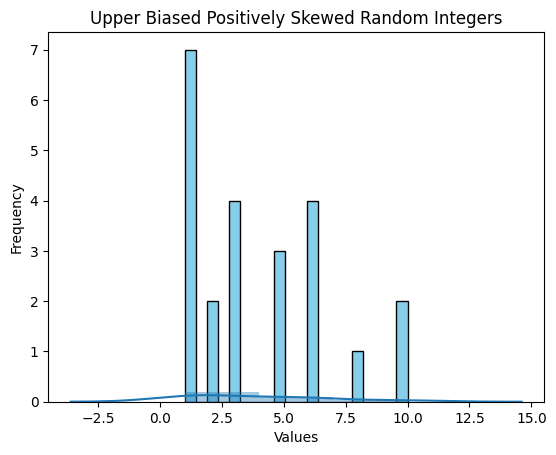

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_57152/2697918401.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(upper_biased_positively_skewed_numbers)


<Axes: ylabel='Density'>

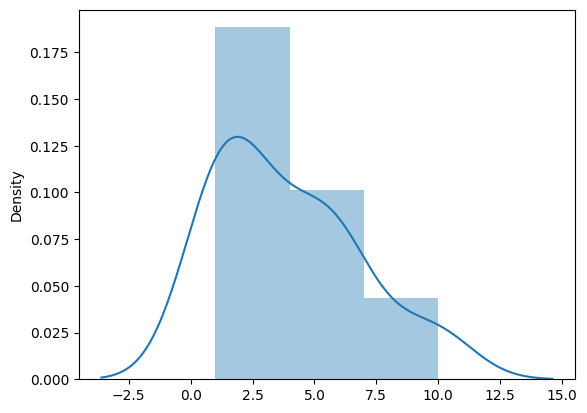

In [242]:
def generate_upper_biased_positively_skewed_random_integers(size, lower_bound, upper_bound, skewness_parameter, scale_parameter):
    # Generate random integers with positive skew and bias towards upper bounds within the specified range
    lower_bound = max(lower_bound, 1)  # Ensure lower_bound is at least 1
    upper_biased_integers = np.random.gamma(skewness_parameter, scale_parameter, size)
    upper_biased_integers = np.clip(upper_biased_integers, lower_bound, upper_bound)
    
    return upper_biased_integers.astype(int)

def plot_histogram(data, title="Histogram", xlabel="Values", ylabel="Frequency"):
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage
size_of_list = 23
lower_bound = 1
upper_bound = 10
skewness_parameter = 2  # Adjust the shape parameter for positive skewness
scale_parameter = 2  # Adjust the scale parameter for bias towards upper bounds

upper_biased_positively_skewed_numbers = generate_upper_biased_positively_skewed_random_integers(
    size_of_list, lower_bound, upper_bound, skewness_parameter, scale_parameter
)
# Plot the histogram
plot_histogram(
    upper_biased_positively_skewed_numbers,
    title="Upper Biased Positively Skewed Random Integers",
    xlabel="Values",
    ylabel="Frequency"
)
import seaborn as sns
sns.distplot(upper_biased_positively_skewed_numbers)

### (iii) Bimodal

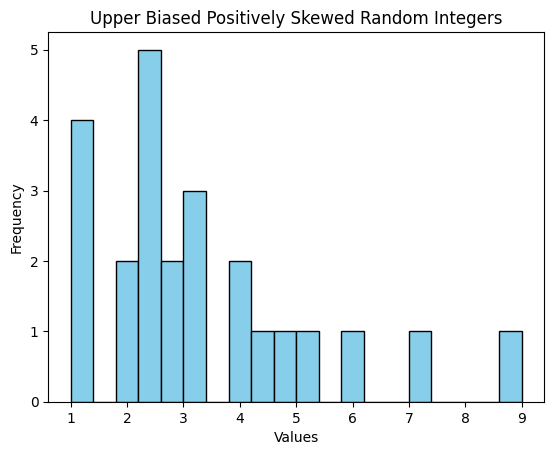

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_57152/4222311899.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bimode)


<Axes: ylabel='Density'>

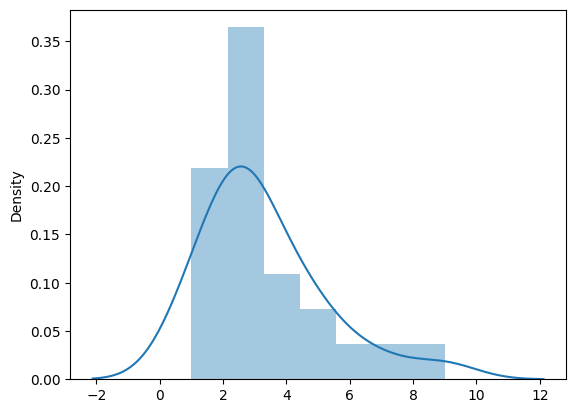

In [230]:
t = np.random.randint(1, 6, size=11)
p = [random.randint(1, 12) for _ in range(11)]
mu = np.mean(t)
sigma = np.std(t)
Gaussian = np.random.normal(round(mu, 0), round(sigma, 0), 12)

# Example usage
size_of_list = 12
lower_bound = 1
upper_bound = 10
skewness_parameter = 2  # Adjust the shape parameter for positive skewness
scale_parameter = 2  # Adjust the scale parameter for bias towards upper bounds


upper_biased_positively_skewed_numbers = generate_upper_biased_positively_skewed_random_integers(
    size_of_list, lower_bound, upper_bound, skewness_parameter, scale_parameter)

bimode = np.concatenate((Gaussian, upper_biased_positively_skewed_numbers))

# Plot the histogram
plot_histogram(
    bimode,
    title="Upper Biased Positively Skewed Random Integers",
    xlabel="Values",
    ylabel="Frequency"
)

import seaborn as sns
sns.distplot(bimode)